In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
data = pd.read_csv(r"./cdata.csv")

In [146]:
data

,x,y,cluster
0,2.1364,0.8369,1
1,7.4096,-1.4137,3
2,5.0996,1.1552,0
3,7.8149,-1.0186,3
4,1.8925,1.2714,1
...,...,...,...
295,1.5798,1.9737,1
296,1.3918,2.5183,1
297,4.5359,0.4390,0
298,7.7911,0.3695,3


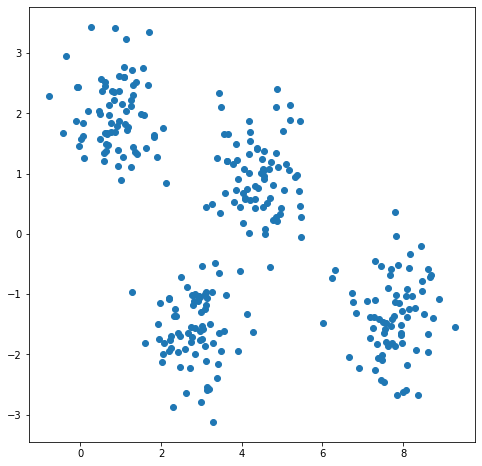

In [147]:
plt.figure(figsize=(8,8))
plt.scatter(data.x,data.y)
plt.show()

# k-means
- 1.select K data point as initial centorids  
- 2.repeat  
- 3.    Form K clusters by assigning all points to the closet centorids  
- 4.    Recompute the centroid of each cluster  
- 5.until the ceentorids don't change  

In [148]:
# Implement
# step1.choice 4 samples from data and define k=4
k = len(data["cluster"].unique())
# np.random.seed(1024)
ini_x = np.random.uniform(low=-1,high=9,size=4)
ini_y = np.random.uniform(low=-4,high=4,size=4)

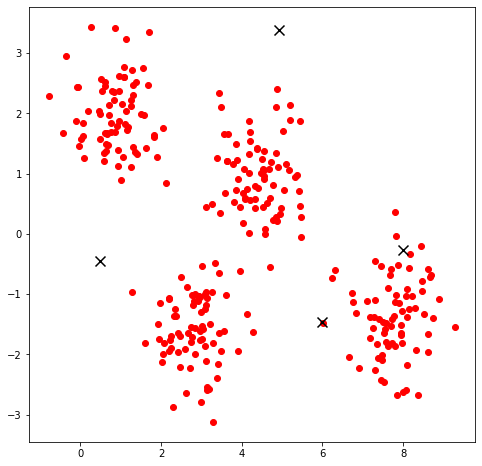

In [149]:
plt.figure(figsize=(8,8))
plt.scatter(data.x,data.y,c="red")
plt.scatter(ini_x,ini_y,marker="x",s=100,c='black')
plt.show()

In [150]:
# define Euclidean distance
def euclidean(x1,x2,y1,y2): #   (x1,y1)-(x2-y2)
    x_dist = (x1-x2)**2
    y_dist = (y1-y2)**2
    dist = np.sqrt(x_dist+y_dist)
    return dist

1.6145738461538457
0.5159730769230768
8.024488679245284
-1.2244509433962263
4.318925
1.3481291666666664
5.041237681159419
-0.9969405797101449


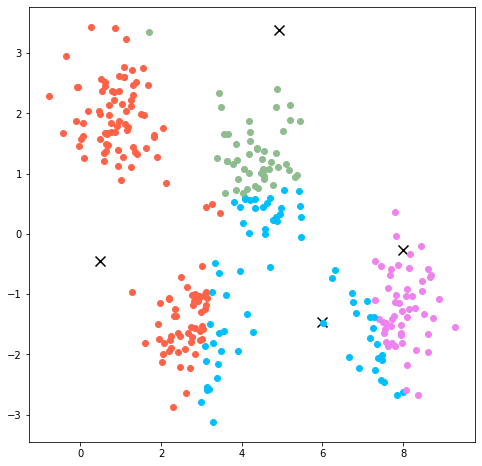

In [151]:
# repeat this procedure
plt.figure(figsize=(8,8))
n_cluster = []
cluster_sse = []
colors = ["tomato","deepskyblue","darkseagreen","violet"]
# repeat:def kmeans(data,k,epoch)
sse = 0
plt.scatter(ini_x,ini_y,marker="x",s=100,c='black')
for i in data.index:
    dist_list = []
    dist = euclidean(data.iloc[i].x,ini_x,data.iloc[i].y,ini_y)
    dist_list.append(dist)
    cluster = np.argmin(np.array(dist_list))
    n_cluster.append(cluster)
    sse += np.min(dist_list)
    plt.scatter(data.iloc[i].x,data.iloc[i].y,c=colors[cluster])
# updata each group centroid point
data["cluster"] = n_cluster
for k in data["cluster"].unique():
    print(data[data["cluster"]==k].x.mean())
    ini_x[k] = data[data["cluster"]==k].x.mean()
    print(data[data["cluster"]==k].y.mean())
    ini_y[k] = data[data["cluster"]==k].y.mean()

In [152]:
data["cluster"] = n_cluster


In [153]:
for k in data["cluster"].unique():
    print(data[data["cluster"]==k].x.mean())
    ini_x[k] = data[data["cluster"]==k].x.mean()
    print(data[data["cluster"]==k].y.mean())
    ini_y[k] = data[data["cluster"]==k].y.mean()

1.6145738461538457
0.5159730769230768
8.024488679245284
-1.2244509433962263
4.318925
1.3481291666666664
5.041237681159419
-0.9969405797101449


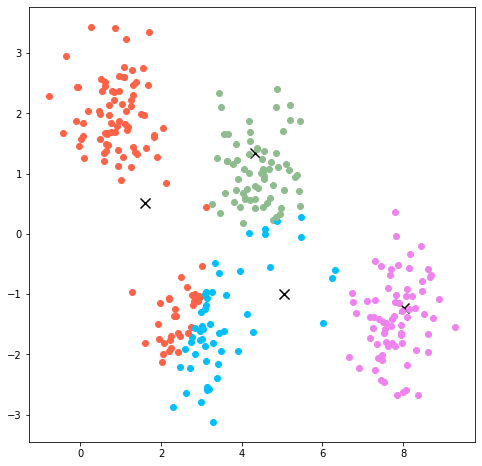

In [154]:
plt.figure(figsize=(8,8))
n_cluster = []
cluster_sse = []
colors = ["tomato","deepskyblue","darkseagreen","violet"]
sse = 0
plt.scatter(ini_x,ini_y,marker="x",s=100,c='black')
for i in data.index:
    dist_list = []
    dist = euclidean(data.iloc[i].x,ini_x,data.iloc[i].y,ini_y)
    dist_list.append(dist)
    cluster = np.argmin(np.array(dist_list))
    n_cluster.append(cluster)
    sse += np.min(dist_list)
    plt.scatter(data.iloc[i].x,data.iloc[i].y,c=colors[cluster])

In [172]:
def kmeans(data,k,iterations):
    ini_x = np.random.uniform(low=-1,high=9,size=k)
    ini_y = np.random.uniform(low=-4,high=4,size=k)
    ini_sse = 100000
    for j in range(iterations):
        sse = 0
        n_cluster = []
        cluster_sse = []
        plt.subplot(2,2,j+1)
        for i in data.index:
            plt.scatter(ini_x,ini_y,marker="x",s=100,c='black')
            dist_list = []
            dist = euclidean(data.iloc[i].x,ini_x,data.iloc[i].y,ini_y)
            dist_list.append(dist)
            cluster = np.argmin(np.array(dist_list))
            n_cluster.append(cluster)
            sse += np.min(dist_list)
            plt.scatter(data.iloc[i].x,data.iloc[i].y,c=colors[cluster]) #  draw plot  
        # updata each group centroid point
        data["cluster"] = n_cluster
        for n in range(k):
            ini_x[n] = data[data["cluster"]==n].x.mean()
            ini_y[n] = data[data["cluster"]==n].y.mean()
        if sse < ini_sse:
            ini_sse = sse
        else:
            break
        print(sse)

717.5473167756387
394.49002529151437
374.4479091530709
346.4707676824204


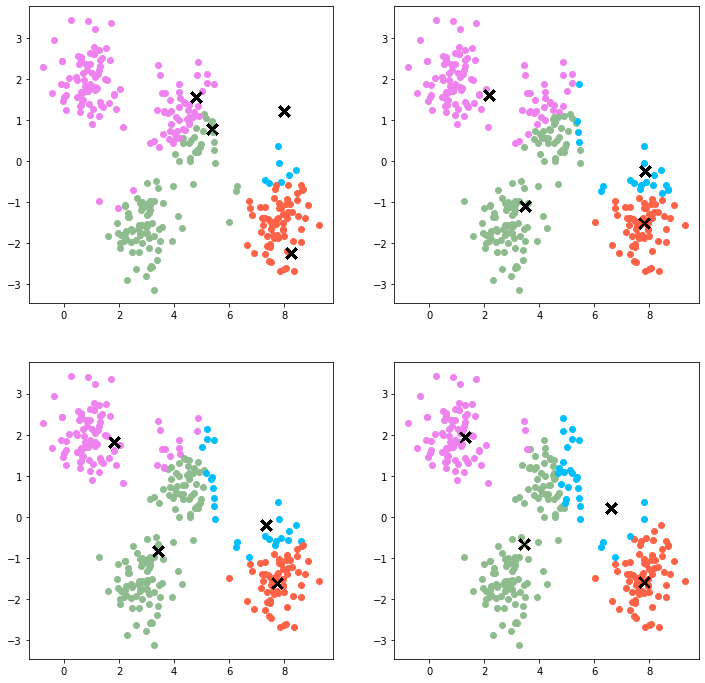

In [173]:
plt.figure(figsize=(12,12))
colors = ["tomato","deepskyblue","darkseagreen","violet"]
kmeans(data,k=4,iterations=4)